In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

/home/carlo/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/carlo/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/carlo/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/carlo/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [4]:
data_file = pd.read_csv('data/landingData.csv')
column_names = ['pos_z','index']
feature_names = column_names[0]
label_name = ['index']
print("Feature: {}".format(feature_names))
print("Label: {}".format(label_name))

Feature: pos_z
Label: ['index']


In [5]:
Vx_train, Vx_test, labelVx_train, labelVx_test = train_test_split(data_file[feature_names], data_file[label_name[0]], test_size=0.1)

In [18]:
modelVx = keras.Sequential([
        keras.layers.Dense(16, activation=tf.nn.relu,input_shape=(1,)),
        keras.layers.Dense(32,activation=tf.nn.relu),
        keras.layers.Dense(32,activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
optimizer = tf.keras.optimizers.RMSprop(0.001)
modelVx.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae']             
             )
modelVx.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [19]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel("Mean Abs Error [1000$]")
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
            label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label='Val Loss')
    plt.legend()
    plt.ylim([0,5])

Train on 756 samples, validate on 84 samples
Epoch 1/60
756/756 [==============================] - 0s 92us/sample - loss: 0.6896 - mean_absolute_error: 0.7122 - val_loss: 0.5838 - val_mean_absolute_error: 0.6442
Epoch 2/60
756/756 [==============================] - 0s 57us/sample - loss: 0.6012 - mean_absolute_error: 0.6640 - val_loss: 0.5195 - val_mean_absolute_error: 0.5753
Epoch 3/60
756/756 [==============================] - 0s 50us/sample - loss: 0.5434 - mean_absolute_error: 0.6314 - val_loss: 0.5025 - val_mean_absolute_error: 0.6173
Epoch 4/60
756/756 [==============================] - 0s 65us/sample - loss: 0.4910 - mean_absolute_error: 0.6007 - val_loss: 0.4422 - val_mean_absolute_error: 0.5389
Epoch 5/60
756/756 [==============================] - 0s 61us/sample - loss: 0.4540 - mean_absolute_error: 0.5786 - val_loss: 0.4505 - val_mean_absolute_error: 0.5843
Epoch 6/60
756/756 [==============================] - 0s 57us/sample - loss: 0.4259 - mean_absolute_error: 0.5613 - val_

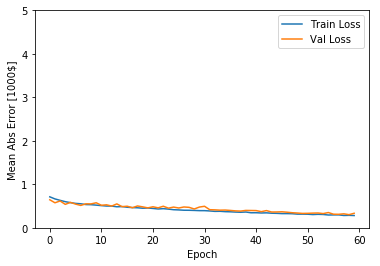

In [21]:
EPOCHS = 60
history=modelVx.fit(Vx_train,
                  labelVx_train,
                  epochs=EPOCHS,
                  validation_split=0.1,
                  verbose=1
                 )
plot_history(history)

In [22]:
[loss, mae] = modelVx.evaluate(Vx_test, labelVx_test, verbose=1)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

94/94 [==============================] - 0s 100us/sample - loss: 0.1845 - mean_absolute_error: 0.3076
Testing set Mean Abs Error: $ 307.65


In [23]:
modelVx.save("models/modelVerticalNN.h5")